# Final step: analyze variation of fermentation products with variation in diet. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.ticker import PercentFormatter
import scipy

import json
import os

capsize=6
#set colorscheme
colorNHANES='blue'
colorav='k'
colorrefdiet='purple'
colorHadza='green'
colorMouse='gray'
colorBK='#fb8072' #color for Burkitt data
colorBK2='gray' #color for Burkitt data
colorlistferm=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']

labelenergybac="energy supply via bacteria (kcal)"
labelenergybacfrac="enery supply via bacteria (%)"
labelenergybacfracnounit="energy supply via bacteria"



#dict to save major characteristics of British reference diet
#load file if already exists, otherwise start with empty dict
try:
    with open('data_analysisresults/BRD_characteristics.json', 'r') as fp:
        BRD = json.load(fp)
except:
    BRD={}
print(BRD)
import FPcalc #basic calculations of 


####dict for diet data
diet_analysis_results={}


{'energy': 2275.0, 'carbohydrates': 276.75, 'sugars': 59.0, 'proteins': 72.05000000000001, 'fat': 105.5, 'fiber': 19.9, 'fiber_low': 14.599999999999998, 'fiber_high': 25.2, 'carbLI': 44.6025, 'carbLI_low': 31.264999999999997, 'carbLI_high': 57.410000000000004, 'carbLI_error': 13.072500000000003, 'bacwetweight': 117.72413793103448, 'fecaldrymass': 29.58620689655172, 'fecaldrymassstd': 6.845624030794191, 'fecealfractionbac': 0.546888888888889, 'fecealfractionbacstd': 0.05063458414079364, 'bacterialdrymass_feces': 16.180367816091955, 'bacterialdrymass_feces_error': 4.014685909630688, 'energybacteria_fromfeces': 101.11785577697411, 'FP_fromfeces': 471.0230005849163, 'FP_fromfeces_g': [10.904335695602317, 2.153651111637971, 5.520037668578593, 6.865692286187041, 2.47897326682256, 4.179730053279632], 'FP_fromfeces_gsum': 32.10242008210811, 'energyfrac_fromfeces': 0.04444740913273587, 'energybacteria_fromfeces_error': 25.20015915064229, 'energyfrac_fromfeces_error': 0.011076993033249358, 'FP_f

# NHANES and distribution in the US

In [2]:
#read in data from NHANES
#https://wwwn.cdc.gov/nchs/nhanes/Search/DataPage.aspx?Component=Dietary
#newest data from NHANES 2018, available since June 2020
#N2018=pd.read_sas("DR1IFF_J2.XPT.txt",format='xport')
#display(N2018.shape)
N2017=pd.read_sas("data/DR1IFF_J.XPT",format='xport')
display(N2017.shape)
display(N2017.columns)

(112683, 84)

Index(['SEQN', 'WTDRD1', 'WTDR2D', 'DR1ILINE', 'DR1DRSTZ', 'DR1EXMER', 'DRABF',
       'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1CCMNM', 'DR1CCMTX',
       'DR1_020', 'DR1_030Z', 'DR1FS', 'DR1_040Z', 'DR1IFDCD', 'DR1IGRMS',
       'DR1IKCAL', 'DR1IPROT', 'DR1ICARB', 'DR1ISUGR', 'DR1IFIBE', 'DR1ITFAT',
       'DR1ISFAT', 'DR1IMFAT', 'DR1IPFAT', 'DR1ICHOL', 'DR1IATOC', 'DR1IATOA',
       'DR1IRET', 'DR1IVARA', 'DR1IACAR', 'DR1IBCAR', 'DR1ICRYP', 'DR1ILYCO',
       'DR1ILZ', 'DR1IVB1', 'DR1IVB2', 'DR1INIAC', 'DR1IVB6', 'DR1IFOLA',
       'DR1IFA', 'DR1IFF', 'DR1IFDFE', 'DR1ICHL', 'DR1IVB12', 'DR1IB12A',
       'DR1IVC', 'DR1IVD', 'DR1IVK', 'DR1ICALC', 'DR1IPHOS', 'DR1IMAGN',
       'DR1IIRON', 'DR1IZINC', 'DR1ICOPP', 'DR1ISODI', 'DR1IPOTA', 'DR1ISELE',
       'DR1ICAFF', 'DR1ITHEO', 'DR1IALCO', 'DR1IMOIS', 'DR1IS040', 'DR1IS060',
       'DR1IS080', 'DR1IS100', 'DR1IS120', 'DR1IS140', 'DR1IS160', 'DR1IS180',
       'DR1IM161', 'DR1IM181', 'DR1IM201', 'DR1IM221', 'DR1IP182', 'DR1IP183',

### Looking at age distribution of participants

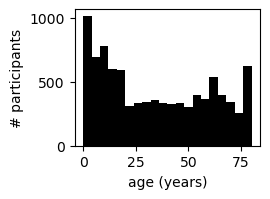

In [3]:
#looking at demographic data

N2017demo=pd.read_sas("data/DEMO_J.XPT",format='xport')

fig, axs = plt.subplots(1,1, figsize=(2.8,1*2.1))
axs=[axs]
axs[0].hist(N2017demo['RIDAGEYR'],bins=20,density=False,label='NHANES 2017/18',color='k')
axs[0].set_xlabel('age (years)')
axs[0].set_ylabel('# participants')
fig.tight_layout()


fig.savefig("plot_output/NHANES_age_distribution.pdf")

#Respondent sequence number

,SEQN,WTDRD1,WTDR2D,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DR1IM181,DR1IM201,DR1IM221,DR1IP182,DR1IP183,DR1IP184,DR1IP204,DR1IP205,DR1IP225,DR1IP226
0,93704.0,1.062282e+06,1.071757e+06,91.0,13.0,637.0,26.0,26.0,91.0,26.0,...,13.682,0.392,0.029,11.087,1.054,3.100000e-02,0.079,0.080,0.027,1.500000e-01
1,93705.0,1.221545e+05,9.588665e+04,153.0,17.0,1241.0,34.0,34.0,85.0,17.0,...,16.047,0.101,0.014,17.805,1.943,9.175929e-78,0.014,0.001,0.001,1.000000e-03
2,93706.0,5.171106e+04,4.318084e-78,36.0,8.0,688.0,16.0,8.0,0.0,48.0,...,41.577,0.524,0.011,44.097,5.074,1.600000e-02,0.308,0.021,0.044,2.100000e-02
3,93707.0,2.453404e+05,3.633131e+05,136.0,16.0,1296.0,32.0,32.0,224.0,32.0,...,32.089,0.284,0.046,11.221,0.873,2.000000e-03,0.237,0.008,0.015,5.800000e-02
4,93708.0,1.515576e+05,3.147460e+05,105.0,14.0,1022.0,28.0,28.0,574.0,98.0,...,28.177,0.310,0.003,13.927,0.804,7.556647e-78,0.038,0.001,0.004,7.556647e-78


(7640, 84)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,...,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,...,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,...,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,...,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88


,SEQN,WTDRD1,WTDR2D,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93704.0,1.062282e+06,1.071757e+06,91.0,13.0,637.0,26.0,26.0,91.0,26.0,...,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
1,93705.0,1.221545e+05,9.588665e+04,153.0,17.0,1241.0,34.0,34.0,85.0,17.0,...,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
2,93706.0,5.171106e+04,4.318084e-78,36.0,8.0,688.0,16.0,8.0,0.0,48.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
3,93707.0,2.453404e+05,3.633131e+05,136.0,16.0,1296.0,32.0,32.0,224.0,32.0,...,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88
4,93708.0,1.515576e+05,3.147460e+05,105.0,14.0,1022.0,28.0,28.0,574.0,98.0,...,1.0,1.0,1.0,13329.450589,14372.488765,2.0,138.0,6.0,6.0,1.63


(7640, 129)

carb LI 0754
1       14.9250
4       21.0405
6       55.4085
8       22.4370
9       24.3315
         ...   
7633    36.9090
7635    33.5115
7636    72.6105
7637    28.0350
7639    18.6345
Name: carbLI075, Length: 4741, dtype: float64
print CV
0.5299387184049913
0.5348586711330319
0.5299387184049913
0.5322637607016985


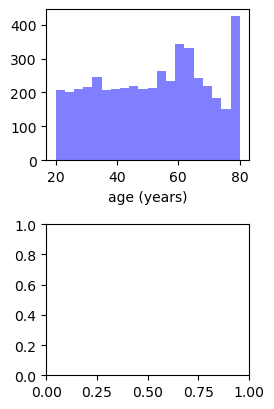

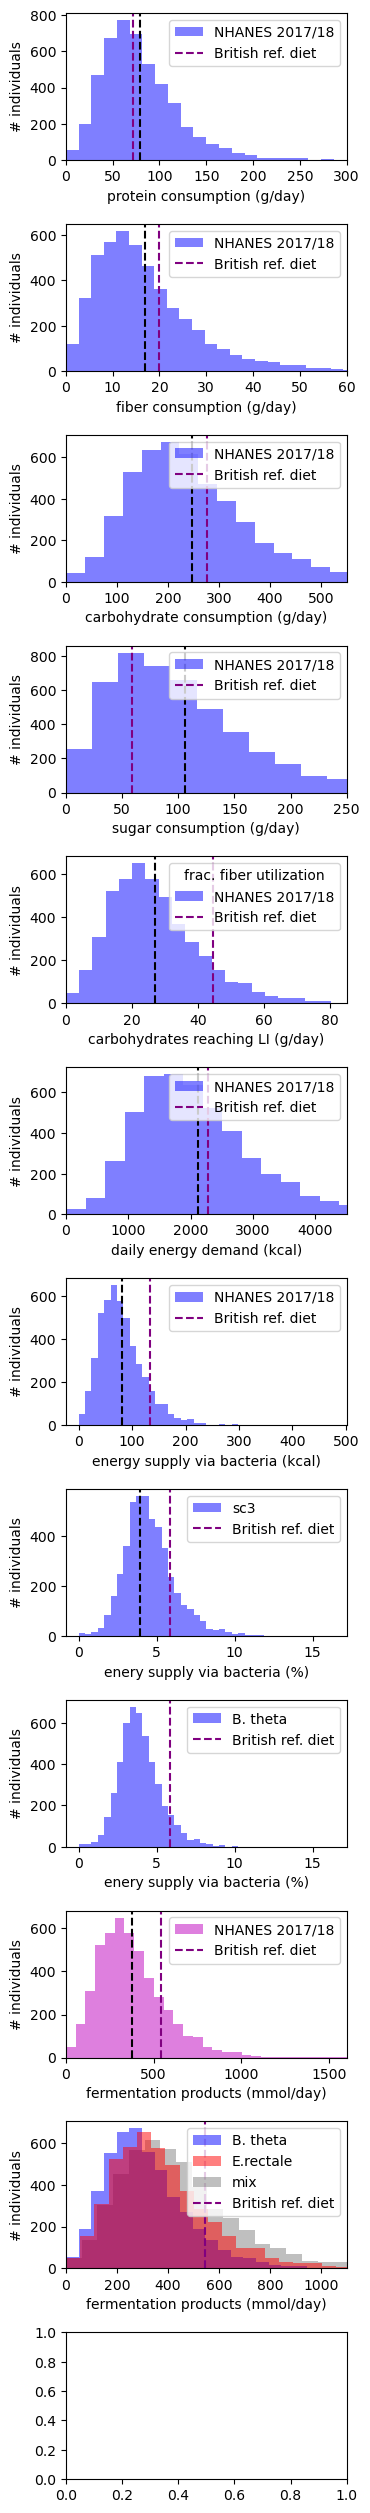

In [29]:



densitychoice=False
ylabelhis="# individuals"
#plot a few examples

perin=N2017.groupby('SEQN', as_index=False).sum()
display(perin.head())
display(perin.shape) 
display(N2017demo.head()) 


colorh=colorNHANES



perin=perin.merge(N2017demo,on="SEQN",how='left')
display(perin.head())
display(perin.shape)


if 3>2:
    #fiberdigestion in [.5]:
    fiberdigestion=.5
    ####
    #select which individuals to look at 
    #only look at adjults
    ####
    perin=perin.query('RIDAGEYR >= 20') #here all above age 20

    #plot distribution of ages
    fig, axs = plt.subplots(2,1, figsize=(2.8,2*2.1))
    axs[0].hist(perin['RIDAGEYR'],bins=20,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[0].set_xlabel('age (years)')
    plt.savefig("nutrient_distribution.pdf")
    plt.tight_layout()


    ####
    #plot major characteristics of diet
    ####


    fig, axs = plt.subplots(12,1, figsize=(3.8,12*2.1))
    c=-1


    #plot histogram of proteins
    c=c+1
    axs[c].hist(perin['DR1IPROT'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("protein consumption (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['DR1IPROT'].mean(),ls='--',color=colorav)
    axs[c].set_xlim(0,300)
    axs[c].axvline(BRD["proteins"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()




    #plot histogram of fiber
    c=c+1
    axs[c].hist(perin['DR1IFIBE'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("fiber consumption (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['DR1IFIBE'].mean(),ls='--',color=colorav)
    axs[c].set_xlim(0,60)
    axs[c].axvline(BRD["fiber"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()




    c=c+1
    #plot histogram of total carbohydrates
    axs[c].hist(perin['DR1ICARB'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("carbohydrate consumption (g/day)")
    axs[c].axvline(perin['DR1ICARB'].mean(),ls='--',color=colorav)
    axs[c].set_ylabel(ylabelhis)
    axs[c].set_xlim(0,550)
    axs[c].axvline(BRD["carbohydrates"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()

    c=c+1
    #plot histogram of sugars
    axs[c].hist(perin['DR1ISUGR'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("sugar consumption (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['DR1ISUGR'].mean(),ls='--',color=colorav)
    axs[c].set_xlim(0,250)
    axs[c].axvline(BRD["sugars"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()

    #estimate carbon reaching LI
    c=c+1

    ######
    #calculate carbohydrates which is available for bacterial digestion
    ######

    perin["carbLI"]=FPcalc.estimate_carbsforbacteria(perin['DR1ICARB'],perin['DR1IFIBE'],perin['DR1ISUGR'],fiberdigestion=fiberdigestion,starchpassage=0.15)
    perin["carbLI05"]=FPcalc.estimate_carbsforbacteria(perin['DR1ICARB'],perin['DR1IFIBE'],perin['DR1ISUGR'],fiberdigestion=0.5,starchpassage=0.15)
    perin["carbLI025"]=FPcalc.estimate_carbsforbacteria(perin['DR1ICARB'],perin['DR1IFIBE'],perin['DR1ISUGR'],fiberdigestion=0.25,starchpassage=0.15)
    perin["carbLI075"]=FPcalc.estimate_carbsforbacteria(perin['DR1ICARB'],perin['DR1IFIBE'],perin['DR1ISUGR'],fiberdigestion=0.75,starchpassage=0.15)

    axs[c].hist(perin['carbLI'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    
    axs[c].set_xlabel("carbohydrates reaching LI (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].set_xlim(0,85)
    axs[c].axvline(perin['carbLI'].mean(),ls='--',color=colorav)
    axs[c].axvline(BRD["carbLI"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend(title='frac. fiber utilization')


    c=c+1
    #plot histogram of calories
    axs[c].hist(perin['DR1IKCAL'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("daily energy demand (kcal)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['DR1IKCAL'].mean(),ls='--',color=colorav)
    axs[c].set_xlim(0,4500)
    axs[c].axvline(BRD["energy"],ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()


   
    
    c=c+1
    print("carb LI 0754")
    print(perin['carbLI075'])
    
    #calculate different energy contributions etc
    perin["energyBE"],perin["fermBE"]=FPcalc.energycalc_array(perin['carbLI'].to_numpy(),scenario='reference',calctype='from_carbs')
    perin["energyBE_1"],perin["fermBE_1"]=FPcalc.energycalc_array(perin['carbLI025'].to_numpy(),scenario='scenario1',calctype='from_carbs')
    perin["energyBE_2"],perin["fermBE_2"]=FPcalc.energycalc_array(perin['carbLI05'].to_numpy(),scenario='scenario2',calctype='from_carbs')
    perin["energyBE_3"],perin["fermBE_3"]=FPcalc.energycalc_array(perin['carbLI075'].to_numpy(),scenario='scenario3',calctype='from_carbs')

    axs[c].hist(perin['energyBE'],bins=40,density=False,label='NHANES 2017/18',color=colorNHANES,alpha=0.5)
    axs[c].axvline(perin['energyBE'].mean(),ls='--',color=colorav)
    axs[c].axvline(BRD["energy_fromcarbs"],ls='--',color=colorrefdiet,label='British ref. diet')

    axs[c].set_xlabel(labelenergybac)
    axs[c].set_ylabel(ylabelhis)
    perin["energyfracBE"]=perin['energyBE']/perin['DR1IKCAL']*100
    perin["energyfracBE_1"]=perin['energyBE_1']/perin['DR1IKCAL']*100
    perin["energyfracBE_2"]=perin['energyBE_2']/perin['DR1IKCAL']*100
    perin["energyfracBE_3"]=perin['energyBE_3']/perin['DR1IKCAL']*100

    axs[c].legend()

    c=c+1
    axs[c].hist(perin["energyfracBE_3"],bins=40,density=False,label='sc3',color=colorNHANES,alpha=0.5,zorder=-1)
    axs[c].set_xlabel(labelenergybacfrac)
    axs[c].set_ylabel(ylabelhis)

    axs[c].axvline(perin['energyfracBE'].mean(),ls='--',color=colorav)
    axs[c].axvline(BRD["energyfrac_fromcarbs"]*100,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()

    c=c+1
    #plot histogram of energy contribution
    axs[c].hist(perin["energyfracBE"],bins=40,density=False,label='B. theta',color='b',alpha=0.5)
    axs[c].set_xlabel(labelenergybacfrac)
    axs[c].set_ylabel(ylabelhis)

    axs[c].axvline(BRD["energyfrac_fromcarbs"]*100,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()

    ###plot fermentation products #mix of both strains
    c=c+1
    #plot histogram of energy contribution
    axs[c].hist(perin["fermBE"],bins=40,density=False,label='NHANES 2017/18',color='m',alpha=0.5) #colorNHANES
    #axs[c].hist(perin["energyfracBE"],bins=40,density=True,label='mix',color='gray',alpha=0.5,zorder=-1)
    axs[c].set_xlabel("fermentation products (mmol/day)")
    axs[c].set_ylabel(ylabelhis)

    axs[c].axvline(perin['fermBE'].mean(),ls='--',color=colorav)
    axs[c].axvline((BRD["FP_fromfeces"]+BRD["FP_fromcarbs"])/2.,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].set_xlim(0,1600)
    axs[c].legend()





    ###plot fermentation products, strains seperately
    c=c+1
    #plot histogram of energy contribution
  

    axs[c].hist(perin["fermBE_1"],bins=40,density=False,label='B. theta',color='b',alpha=0.5)
    axs[c].hist(perin["fermBE_2"],bins=40,density=False,label='E.rectale',color='r',alpha=0.5)
    axs[c].hist(perin["fermBE_3"],bins=40,density=False,label='mix',color='gray',alpha=0.5,zorder=-1)

    print("print CV")
    print(perin["fermBE"].std()/perin["fermBE"].mean())
    
    print(perin["fermBE_1"].std()/perin["fermBE_1"].mean())
    print(perin["fermBE_2"].std()/perin["fermBE_2"].mean())
    print(perin["fermBE_3"].std()/perin["fermBE_3"].mean())
    diet_analysis_results["CV_NHANES"]=perin["fermBE_1"].std()/perin["fermBE_1"].mean()

    
    axs[c].set_xlabel("fermentation products (mmol/day)")
    axs[c].set_ylabel(ylabelhis)

    #axs[c].axvline(perin['fermBonly'].mean(),ls='--',color='b')
    #axs[c].axvline(perin['fermEonly'].mean(),ls='--',color='r')
    #axs[c].axvline(perin['energyfracBE'].mean(),ls='--',color=colorav)
    axs[c].axvline((BRD["FP_fromfeces"]+BRD["FP_fromcarbs"])/2.,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].set_xlim(0,1100)
    axs[c].legend()
    #calculate energy contribution
    #perin['fractionenergy']/(perin['DR1IKCAL']*0.00419)
    plt.tight_layout()
    plt.savefig("plot_output_figure4/nutrient_distribution_NHANES"+str(fiberdigestion)+".pdf")



# Hadza

## Todo: For Fig. 2, prepare plot for total carbohydrates (sum fiber and carbohydrate)

,month,fiber,protein,fat,carbohydrate,honey,carbLI05,carbLI025,carbLI075,kcal
0,1,101,124,49,326,103,77.9685,59.0310,96.9060,2241
1,2,74,64,43,400,367,56.3715,42.4965,70.2465,2243
2,3,78,105,41,363,193,67.1985,52.5735,81.8235,2241
3,4,24,103,49,347,402,26.6790,22.1790,31.1790,2241
4,5,45,119,50,330,281,42.3495,33.9120,50.7870,2246
5,6,66,98,39,375,233,61.0785,48.7035,73.4535,2243
6,7,102,129,41,340,16,87.8820,68.7570,107.0070,2245
7,8,88,183,72,216,51,61.0395,44.5395,77.5395,2244
8,9,52,243,89,118,27,34.8915,25.1415,44.6415,2245
9,10,93,194,77,194,31,61.3245,43.8870,78.7620,2245


4.138632030923219

14.178566758744443

4.138632030923219

14.178566758744443

add hazad
    month  fiber  protein  fat  carbohydrate  honey  carbLI05  carbLI025  \
0       1    101      124   49           326    103   77.9685    59.0310   
1       2     74       64   43           400    367   56.3715    42.4965   
2       3     78      105   41           363    193   67.1985    52.5735   
3       4     24      103   49           347    402   26.6790    22.1790   
4       5     45      119   50           330    281   42.3495    33.9120   
5       6     66       98   39           375    233   61.0785    48.7035   
6       7    102      129   41           340     16   87.8820    68.7570   
7       8     88      183   72           216     51   61.0395    44.5395   
8       9     52      243   89           118     27   34.8915    25.1415   
9      10     93      194   77           194     31   61.3245    43.8870   
10     11     94      129   36           350     11   86.8095    69.1845   
11     12     90      101   32           387    120   81.5400    64.6650   

 

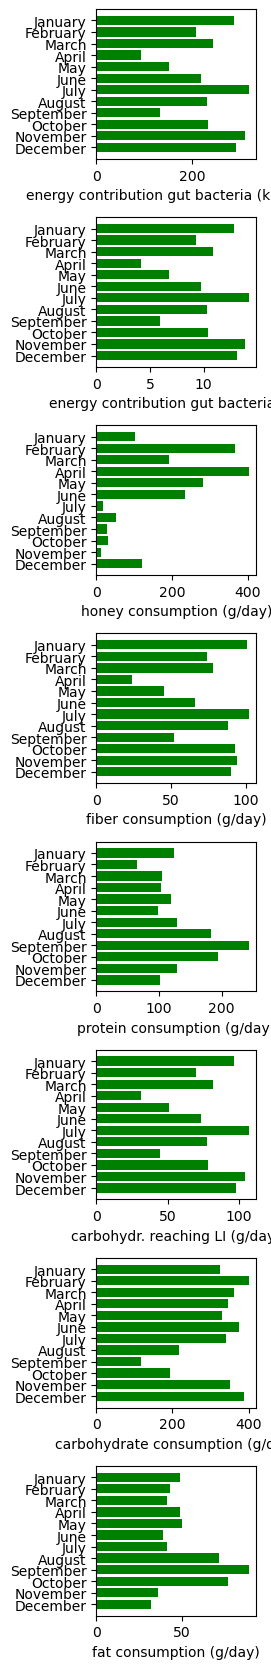

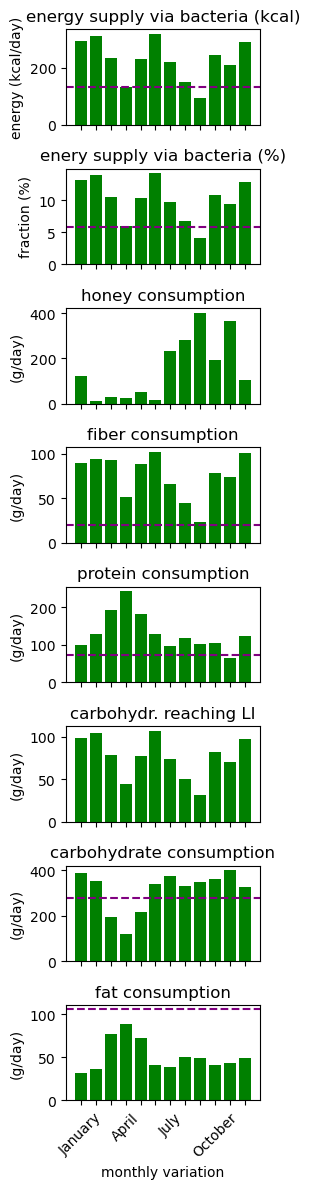

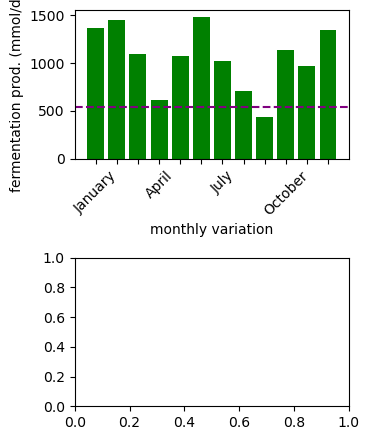

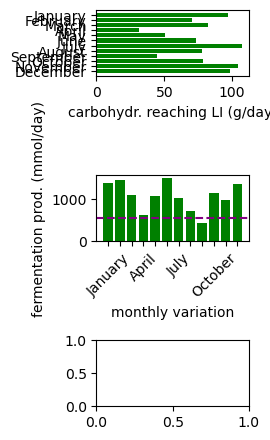

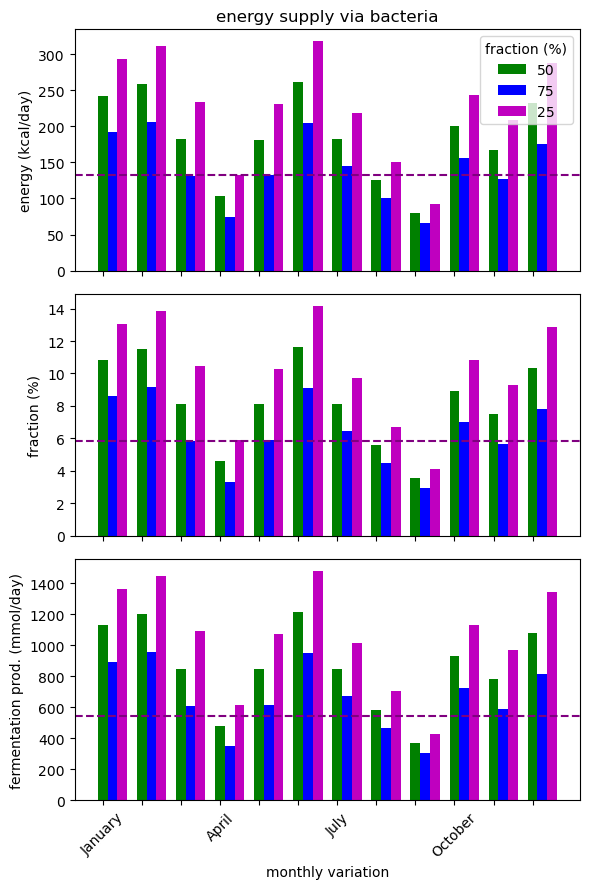

In [5]:
hadzadiet=pd.read_excel("data/Hadza_diet_Pontzeretal_table2.xlsx")




hadzadiet_listfiberfraction=[]
if 3>2:
    fiberfraction=0.75
    hadzadiet["carbLI05"]=fiberfraction*hadzadiet['fiber']*0.5+0.15*(hadzadiet['carbohydrate']-0.57*hadzadiet['honey'])
    hadzadiet["carbLI025"]=fiberfraction*hadzadiet['fiber']*0.25+0.15*(hadzadiet['carbohydrate']-0.57*hadzadiet['honey'])
    hadzadiet["carbLI075"]=fiberfraction*hadzadiet['fiber']*0.75+0.15*(hadzadiet['carbohydrate']-0.57*hadzadiet['honey'])
    
    #calculate caolories
    #4 calories per gram, protein provides 4 calories per gram, and fat provides 9 calories per gram.
    #improve, use data from other study.....
    hadzadiet["kcal"]=hadzadiet['carbohydrate']*4+hadzadiet['protein']*4+hadzadiet['fat']*9
    display(hadzadiet)

    hadzadiet["energyBE05"],hadzadiet['fermentationprodBE05']=FPcalc.energycalc_array(hadzadiet["carbLI05"].to_numpy(),scenario='reference',calctype='from_carbs')
    hadzadiet["energyBE075"],hadzadiet['fermentationprodBE075']=FPcalc.energycalc_array(hadzadiet["carbLI075"].to_numpy(),scenario='reference',calctype='from_carbs')
    hadzadiet["energyBE025"],hadzadiet['fermentationprodBE025']=FPcalc.energycalc_array(hadzadiet["carbLI025"].to_numpy(),scenario='reference',calctype='from_carbs')

    hadzadiet["energyfracBE05"]=hadzadiet['energyBE05']/hadzadiet["kcal"]*100
    hadzadiet["energyfracBE075"]=hadzadiet['energyBE075']/hadzadiet["kcal"]*100
    hadzadiet["energyfracBE025"]=hadzadiet['energyBE025']/hadzadiet["kcal"]*100

    
    #bar plot
    fig, axs = plt.subplots(8,1, figsize=(2.8,8*2.1))

    plt.savefig("nutrient_distribution.pdf")
    plt.tight_layout()

    #bar plot
    months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


    cc=0
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["energyBE075"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('energy contribution gut bacteria (kcal/day)')

    cc=1
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["energyfracBE075"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('energy contribution gut bacteria (%)')


    cc=2
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["honey"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('honey consumption (g/day)')


    cc=3
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["fiber"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('fiber consumption (g/day)')


    cc=4
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["protein"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('protein consumption (g/day)')


    cc=5
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["carbLI075"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('carbohydr. reaching LI (g/day)')


    cc=6
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["carbohydrate"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('carbohydrate consumption (g/day)')

    cc=7
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["fat"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('fat consumption (g/day)')

    plt.savefig("nutrient_distribution_Hadza"+str(fiberfraction)+".pdf")
    plt.tight_layout()
    display(hadzadiet['energyfracBE075'].min())
    display(hadzadiet['energyfracBE075'].max())
    hazav=hadzadiet['energyfracBE075'].mean()
    hazstd=hadzadiet['energyfracBE075'].std()

    #and now the intere thing as horizontal bar plots


    #bar plot
    fig, axs = plt.subplots(8,1, figsize=(2.8,8*1.5))

    #bar plot
    months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


    cc=0
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["energyBE075"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title(labelenergybac)
    axs[cc].set_ylabel("energy (kcal/day)")
    axs[cc].axhline(BRD["energy_fromcarbs"],color=colorrefdiet,ls='--')


    cc=1
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["energyfracBE075"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title(labelenergybacfrac)
    axs[cc].set_ylabel("fraction (%)")
    axs[cc].axhline(BRD["energyfrac_fromcarbs"]*100,color=colorrefdiet,ls='--')


    cc=2
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["honey"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title('honey consumption')
    axs[cc].set_ylabel('(g/day)')
    #axs[cc].axhline(BRD["sugars"],color=colorrefdiet,ls='--')



    cc=3
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["fiber"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title('fiber consumption')
    axs[cc].set_ylabel('(g/day)')
    axs[cc].axhline(BRD["fiber"],color=colorrefdiet,ls='--')








    cc=4
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["protein"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title('protein consumption')
    axs[cc].set_ylabel('(g/day)')
    axs[cc].axhline(BRD["proteins"],color=colorrefdiet,ls='--')

    cc=5
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["carbLI075"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_ylabel('(g/day)')
    axs[cc].set_title('carbohydr. reaching LI')

    cc=6
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["carbohydrate"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title('carbohydrate consumption')
    axs[cc].set_ylabel('(g/day)')
    axs[cc].axhline(BRD["carbohydrates"],color=colorrefdiet,ls='--')

    cc=7
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["fat"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))

    months=['January', '', '', 'April', '', '', 'July', '', '', 'October', '', '']

    axs[cc].set_xticklabels(months[::],rotation=45)
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title("fat consumption")
    axs[cc].set_ylabel('(g/day)')
    axs[cc].set_xlabel('monthly variation')
    axs[cc].axhline(BRD["fat"],color=colorrefdiet,ls='--')




    plt.tight_layout()
    plt.savefig("plot_output_figure4/nutrient_distribution_Hadza_horizontal.pdf")




    #bar plot
    fig, axs = plt.subplots(2,1, figsize=(3.8,3*1.5))
    cc=-1
    
    cc=cc+1
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet['fermentationprodBE075'], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    #axs[cc].set_title('energy contribution gut bacteria')
    axs[cc].set_ylabel("fermentation prod. (mmol/day)")
    axs[cc].axhline((BRD["FP_fromfeces"]+BRD["FP_fromcarbs"])/2.,color=colorrefdiet,ls='--')



    months=['January', '', '', 'April', '', '', 'July', '', '', 'October', '', '']

    axs[cc].set_xticklabels(months[::],rotation=45)
    axs[cc].set_xlabel('monthly variation')

    plt.savefig("plot_output_figure4/nutrient_distribution_Hadza_horizontal_energyonly.pdf")
    plt.tight_layout()



    

    ############
    #old other orientation
    #############
    #bar plot
    fig, axs = plt.subplots(3,1, figsize=(2.8,3*1.5))
    cc=-1
    #bar plot
    months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']



    cc=0
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["carbLI075"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('carbohydr. reaching LI (g/day)')

    cc=cc+1
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet['fermentationprodBE075'], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    #axs[cc].set_title('energy contribution gut bacteria')
    axs[cc].set_ylabel("fermentation prod. (mmol/day)")
    axs[cc].axhline((BRD["FP_fromfeces"]+BRD["FP_fromcarbs"])/2.,color=colorrefdiet,ls='--')



    months=['January', '', '', 'April', '', '', 'July', '', '', 'October', '', '']

    axs[cc].set_xticklabels(months[::],rotation=45)
    axs[cc].set_xlabel('monthly variation')

    plt.savefig("plot_output_figure4/nutrient_distribution_Hadza_horizontal_energyonly.pdf")
    plt.tight_layout()

    #######################
    ####plot different fiber digestion rates
    #######################
    
    
    #bar plot
    fig, axs = plt.subplots(3,1, figsize=(6,3*3))
    cc=-1
    #bar plot
    months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


    cc=cc+1
    #plot energy calculations
    axs[cc].bar(np.array(range(12,0,-1))+0, hadzadiet["energyBE05"],width=0.25, align='center',color=colorHadza,label='50')
    axs[cc].bar(np.array(range(12,0,-1))+0.25, hadzadiet["energyBE025"],width=0.25, align='center',color="b",label='75')
    axs[cc].bar(np.array(range(12,0,-1))+0.5, hadzadiet["energyBE075"],width=0.25, align='center',color="m",label='25')
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    
    
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title(labelenergybacfracnounit)
    axs[cc].set_ylabel("energy (kcal/day)")
    axs[cc].axhline(BRD["energy_fromcarbs"],color=colorrefdiet,ls='--')
    axs[cc].legend(title="fraction (%)")
    
    
    
    cc=cc+1
    #plot energy calculations
    axs[cc].bar(np.array(range(12,0,-1))+0, hadzadiet["energyfracBE05"],width=0.25, align='center',color=colorHadza)
    axs[cc].bar(np.array(range(12,0,-1))+0.25, hadzadiet["energyfracBE025"],width=0.25, align='center',color="b")
    axs[cc].bar(np.array(range(12,0,-1))+0.5, hadzadiet["energyfracBE075"],width=0.25, align='center',color="m")
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    #axs[cc].set_title('energy contribution gut bacteria')
    axs[cc].set_ylabel("fraction (%)")
    axs[cc].axhline(BRD["energyfrac_fromcarbs"]*100,color=colorrefdiet,ls='--')

    
    cc=cc+1
    #plot energy calculations
    axs[cc].bar(np.array(range(12,0,-1))+0, hadzadiet["fermentationprodBE05"],width=0.25, align='center',color=colorHadza)
    axs[cc].bar(np.array(range(12,0,-1))+0.25, hadzadiet["fermentationprodBE025"],width=0.25, align='center',color="b")
    axs[cc].bar(np.array(range(12,0,-1))+0.5, hadzadiet["fermentationprodBE075"],width=0.25, align='center',color="m")
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    #axs[cc].set_title('energy contribution gut bacteria')
    axs[cc].set_ylabel("fermentation prod. (mmol/day)")
    axs[cc].axhline((BRD["FP_fromfeces"]+BRD["FP_fromcarbs"])/2.,color=colorrefdiet,ls='--')

    months=['January', '', '', 'April', '', '', 'July', '', '', 'October', '', '']

    axs[cc].set_xticklabels(months[::],rotation=45)
    axs[cc].set_xlabel('monthly variation')

    plt.savefig("plot_output_figure4/nutrient_distribution_Hadza_horizontal_energyonly_fiberdigestion.pdf")
    plt.tight_layout()

    #same plot again, only energy contribution

    display(hadzadiet['energyfracBE075'].min())
    display(hadzadiet['energyfracBE075'].max())
    hazav=hadzadiet['energyfracBE075'].mean()
    hazstd=hadzadiet['energyfracBE075'].std()
    print("add hazad")
    print(hadzadiet)
    hadzadiet_listfiberfraction.append(hadzadiet)
    
print(hadzadiet_listfiberfraction)


0.31676787237167614
0.31676787237167614


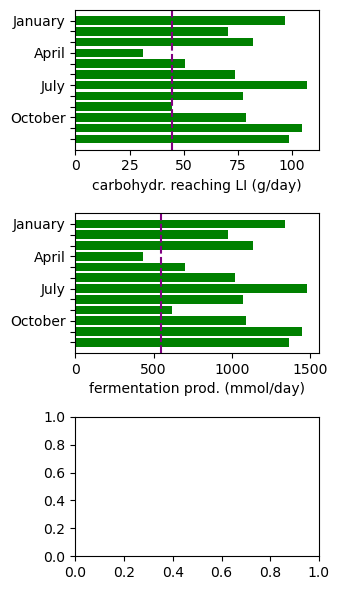

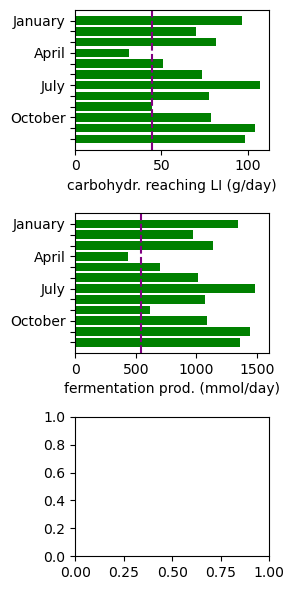

In [32]:

############
#old other orientation
#############
#bar plot
fig, axs = plt.subplots(3,1, figsize=(3.5,3*2))
cc=-1
#bar plot
#months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

months=['January', '', '', 'April', '', '', 'July', '', '', 'October', '', '']


cc=0
#plot energy calculations
axs[cc].barh(range(12,0,-1), hadzadiet["carbLI075"], align='center',color=colorHadza)
axs[cc].set_yticks(range(1,13,1))
axs[cc].set_yticklabels(months[::-1])
#ax.invert_yaxis()  # labels read top-to-bottom
axs[cc].set_xlabel('carbohydr. reaching LI (g/day)')
axs[cc].axvline((BRD["carbLI"]),color=colorrefdiet,ls='--')

cc=1

axs[cc].barh(range(12,0,-1), hadzadiet["fermentationprodBE075"], align='center',color=colorHadza)
axs[cc].set_yticks(range(1,13,1))
axs[cc].set_yticklabels(months[::-1])
#ax.invert_yaxis()  # labels read top-to-bottom
axs[cc].set_xlabel("fermentation prod. (mmol/day)")

#axs[cc].axhline((BD_ferm_fromfeces+BD_ferm_fromcarbs)/2.,color=colorrefdiet,ls='--')
axs[cc].axvline((BRD["FP_fromfeces"]+BRD["FP_fromcarbs"])/2.,color=colorrefdiet,ls='--')


diet_analysis_results["CV_HADZA"]=hadzadiet["fermentationprodBE075"].std()/hadzadiet["fermentationprodBE075"].mean()
print(diet_analysis_results["CV_HADZA"])

#axs[cc].set_xticklabels(months[::],rotation=45)
##axs[cc].set_xlabel('monthly variation')

plt.tight_layout()
plt.savefig("plot_output_figure4/nutrient_distribution_Hadza_horizontal_energyonly.pdf")



# Fecal weight distribution and variation in energy contribution (based on Burkitt data)

## Todo: For Fig. 2b, c: plot histogram fecal dry weight, plot total FP vs amount (show corrected values only). 
- explain in Supplementary Fig. what is used here. S3A


,fecal weight,transit time
29,226.275276,12.928184
37,347.758954,14.254193
22,151.159341,14.751431
34,261.051171,15.414373
41,414.065111,16.740382


/var/folders/4b/8dffvbfs5qs93rh77f2zxs340000gn/T/ipykernel_74973/3783741482.py:60: RuntimeWarning: divide by zero encountered in divide
  return a +b/(x)


0.4664944489347303


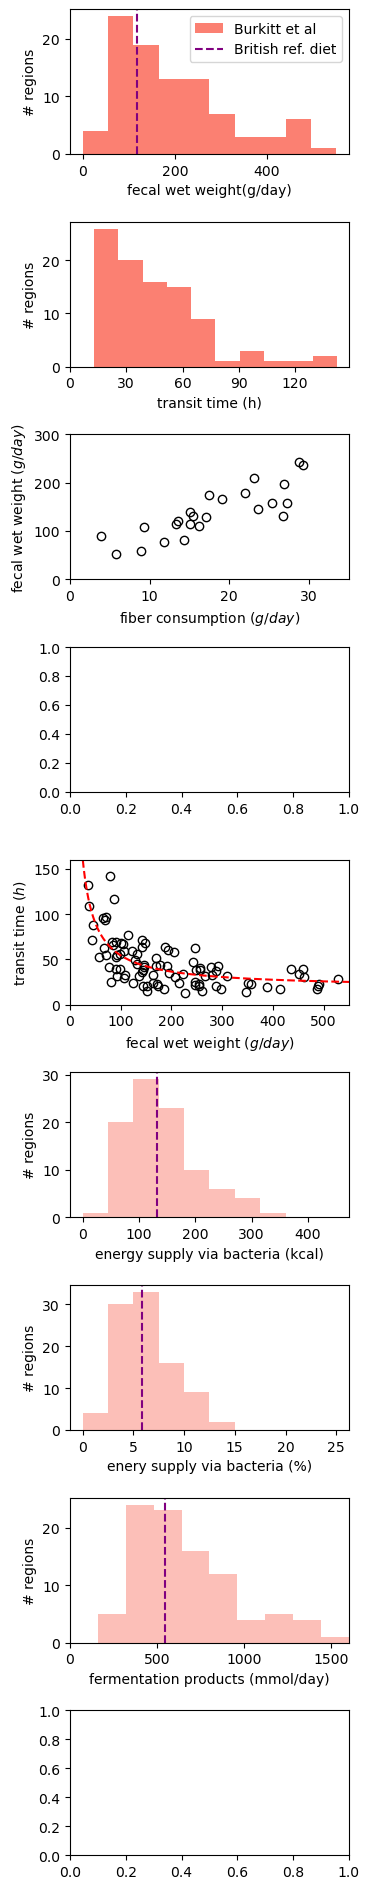

In [47]:


densitychoice=False
ylabelhis="# regions"

#load Burkitt data on fecal wet weight and transit time
Burkittdata=pd.read_csv('data/burkitt_data2.csv')
Burkittdata=Burkittdata.sort_values(by=['transit time'])
display(Burkittdata.head())

#load Cumings et al 1992 on variation in fiber consumption data
CumingsData=pd.read_csv('data/cumings1992_data.csv')
columns=['nonstarch','stoolweight','stoolweight2','ccr']
CumingsData.columns=columns
units=['g/day','g/day','g/day','100k/year age standardized']

#plot different histograms
fig, axs = plt.subplots(9,1, figsize=(3.8,19))

#distribution fecal weight
axs[0].hist(Burkittdata['fecal weight'],density=False,bins=10,label='Burkitt et al',range=(0,550),color=colorBK)
axs[0].axvline(BRD["bacwetweight"],ls='--',color=colorrefdiet,label='British ref. diet')
axs[0].set_ylabel("# regions")
axs[0].set_xlabel("fecal wet weight(g/day)")
axs[0].legend()

#distribution transit time
axs[1].hist(Burkittdata['transit time'],density=False,bins=10,label='Burkitt et al',color=colorBK)
axs[1].set_ylabel("# regions")
axs[1].set_xlabel("transit time (h)")
axs[1].set_xticks([0,30,60,90,120])
#axs[1].legend()

#plot iber consumption vs stool bulk (Cummings data)
axs[2].set_xlabel("fiber consumption $(g/day)$")
axs[2].set_ylabel("fecal wet weight $(g/day)$")
axs[2].plot(CumingsData['nonstarch'],CumingsData['stoolweight'],color='k',ls='',marker='o',markeredgewidth=1,markeredgecolor='k',markerfacecolor='None',label='Cummings et al.')



#add fits to these correlations
xc=CumingsData['nonstarch']
yc=CumingsData['stoolweight']
fit1=np.polyfit(xc,yc,1)
xc=CumingsData['stoolweight2']/fit1[0]-fit1[1]/fit1[0]
xc=xc[:-1]
yc=CumingsData['ccr'][:-1]
#fit3=np.polyfit(xc,yc,3)
axs[2].set_xlim(0,35)
axs[2].set_ylim(0,300)


###look at transit time vs fecal weight
axs[4].plot(Burkittdata['fecal weight'],Burkittdata['transit time'],ls='',marker='o',markeredgewidth=1,markeredgecolor='k',markerfacecolor='None',label='Burkitt et al')
axs[4].set_xlabel("fecal wet weight $(g/day)$")
axs[4].set_ylabel("transit time $(h)$")
axs[4].set_xlim(0,550)
axs[4].set_ylim(0,160)

#fit non-linear function to data
def func2(x, a, b):
  return a +b/(x)
  #return a * np.log(b * x) + c
xc=Burkittdata['fecal weight']
yc=Burkittdata['transit time']
#print(xc)
#print(yc)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func2, xc, yc)
xcc=np.linspace(0,75,100)
#axs[2].plot(xcc, func(xcc, *popt), color='k', label="Fitted Curve")
#p0 = popt[:2]
popt, pcov = curve_fit(func2, xc, yc,method='trf')
xcc=np.linspace(0,600,200)
axs[4].plot(xcc, func2(xcc, *popt), color='r',ls='--', label="fiber-transit-stool model")
#axs[4].legend()

#estimate fp for standard assumption fecal wet to fecal dry mass
finalcalculationmode=3
energyBurkitfecalweight,fermBurkittfecalweight=FPcalc.energycalc_array(FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=finalcalculationmode)*0.548,scenario='reference',calctype='from_feces')

axs[5].hist(energyBurkitfecalweight,label='Burkitt et al (same bact. fraction as ref. diet)',color=colorBK,alpha=.5,range=(0,450))
axs[5].axvline(BRD["energy_fromcarbs"],ls='--',color=colorrefdiet,label='British ref. diet')

axs[5].set_xlabel(labelenergybac)
axs[5].set_ylabel("# regions")

energyratioBurkitfecalweight=energyBurkitfecalweight/BRD["energy"] #assuming fixed rate
energyratioBurkitfecalweight4=energyBurkitfecalweight4/BRD["energy"]
axs[6].hist(energyratioBurkitfecalweight*100,label="same bact. fraction as ref diet)",color=colorBK,alpha=0.5,range=(0,25))
axs[6].axvline(BRD["energyfrac_fromcarbs"]*100,ls='--',label='British ref. diet',color=colorrefdiet)
axs[6].set_xlabel(labelenergybacfrac)
axs[6].set_ylabel("# regions")

#plot fermentation products
#axs[7].hist(fermBurkittfecalweight,label='Burkitt et al (same bact. fraction as ref. diet)',color=colorBK,alpha=0.5)
axs[7].hist(fermBurkittfecalweight,label='Burkitt et al (same bact. fraction as ref. diet)',color=colorBK,alpha=0.5,range=(0,1600))
axs[7].axvline((BRD["FP_fromfeces"]+BRD["FP_fromcarbs"])/2.,ls='--',color=colorrefdiet,label='British ref. diet')
axs[7].set_xlabel("fermentation products (mmol/day)")
axs[7].set_ylabel("# regions")
axs[7].set_xlim(0,1600)
diet_analysis_results["CV_BURKITT"]=fermBurkittfecalweight4.std()/fermBurkittfecalweight4.mean()
print(diet_analysis_results["CV_BURKITT"])

fig.tight_layout()
fig.savefig("plot_output_figure4/fecalconsiderations_Burkitt.pdf")



# Comparison different relations between fecal wet weight and dry weight

To estimate bacterial dry mass from fecal wet mass we first estimate from fecal wet mass the fecal dry mass. 

Data shows that the fraction of fecal mass being dry mass is decreasing with fecal wet mass (See Step 4b - Fecal weight). This holds particularly for a wet mass range between 50 and 300 g/day. For higher fecal mass, observed in Burkit et al in some regions, we could not find any information but would expect that the fraction of dry mass is falling even more but without further studies we decide. 




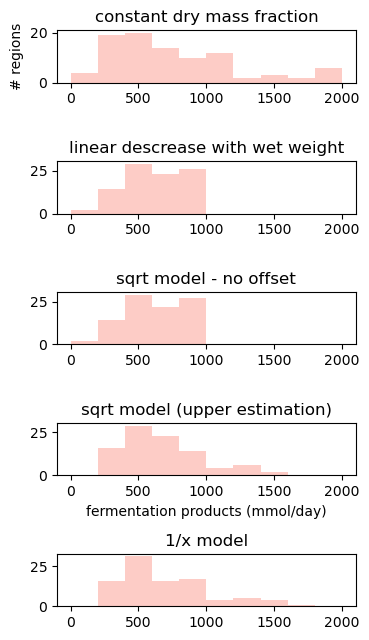

In [48]:

#for all other estimations of fecal dry weight from wet weight
energyBurkitfecalweight0,fermBurkittfecalweight0=FPcalc.energycalc_array(FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=0)*0.548,scenario='reference',calctype='from_feces')
energyBurkitfecalweight1,fermBurkittfecalweight1=FPcalc.energycalc_array(FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=1)*0.548,scenario='reference',calctype='from_feces')
energyBurkitfecalweight2,fermBurkittfecalweight2=FPcalc.energycalc_array(FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=2)*0.548,scenario='reference',calctype='from_feces')
energyBurkitfecalweight3,fermBurkittfecalweight3=FPcalc.energycalc_array(FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=3)*0.548,scenario='reference',calctype='from_feces')
energyBurkitfecalweight4,fermBurkittfecalweight4=FPcalc.energycalc_array(FPcalc.dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=4)*0.548,scenario='reference',calctype='from_feces')

fig, axs = plt.subplots(5,1, figsize=(3.8,5*1.3))
#axs=[axs]

fpmaxr=2000
axs[0].hist(fermBurkittfecalweight0,label='constant',color=colorBK,alpha=.4,range=(0,fpmaxr))
axs[0].set_title("constant dry mass fraction")
#axs[7].hist(energyBurkit,label='calc. from Burkitt et al (RS constant)',color='k',alpha=0.5,range=(0,200))
axs[1].hist(fermBurkittfecalweight1,color=colorBK,alpha=.4,range=(0,fpmaxr),label='lin fit')
axs[1].set_title("linear descrease with wet weight")
axs[2].set_title("sqrt model - no offset")
axs[2].hist(fermBurkittfecalweight2,color=colorBK,alpha=.4,range=(0,fpmaxr),label='sqrt fit')
axs[3].set_title("sqrt model (upper estimation)")
axs[3].hist(fermBurkittfecalweight3,color=colorBK,alpha=.4,range=(0,fpmaxr),label='sqrt lin fit')
axs[4].set_title("1/x model")
axs[4].hist(fermBurkittfecalweight4,color=colorBK,alpha=.4,range=(0,fpmaxr),label='1/x fit')
axs[3].set_xlabel("fermentation products (mmol/day)")
axs[0].set_ylabel("# regions")
plt.tight_layout()
fig.savefig("plot_output_figure4/fecalconsiderations_Burkitt_diff_model_dwcontent.pdf")


# Plot distributions into one plot

Hadza mean
1
1056.7764945863837


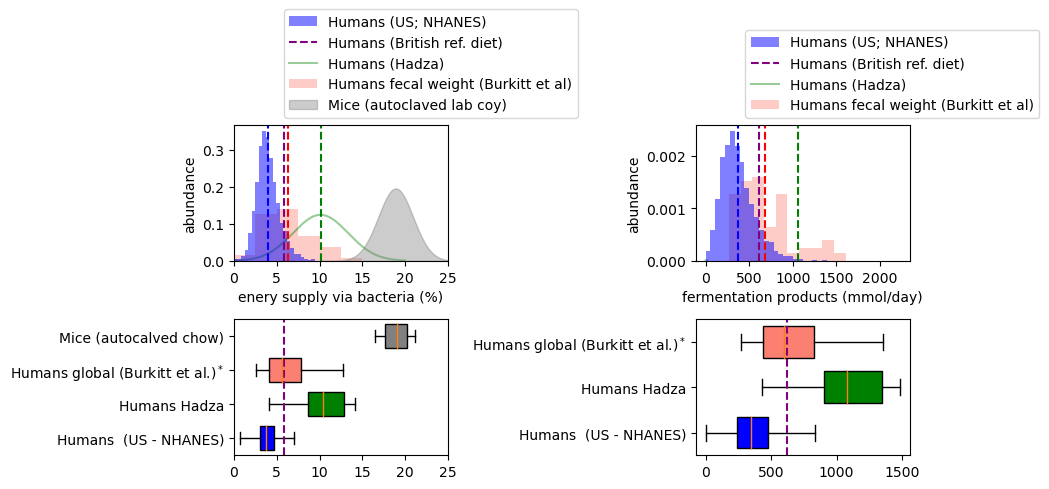

In [26]:
# all in one plot

fig, axs = plt.subplots(2,2, figsize=(2*4.8,2*2.5))

#%%%%%%%%%%%%%%%
#energy distribution
c=0
#start with NHANES data
axs[c,0].hist(perin["energyfracBE"],bins=40,density=True,label='Humans (US; NHANES)',color='b',alpha=0.5)
#axs[c].hist(perin["energyfracEonly"],bins=40,density=True,label='E.rectaly',color='r',alpha=0.5)
#axs[c].hist(perin["energyfracBE05"],bins=40,density=True,label='mix',color='gray',alpha=0.5,zorder=-1)
axs[c,0].set_xlabel(labelenergybacfrac)
axs[c,0].set_ylabel("abundance")
axs[c,0].axvline(perin['energyfracBE'].mean(),ls='--',color=colorNHANES)

#add line reference diet
axs[c,0].axvline(BRD["energyfrac_fromcarbs"]*100,ls='--',color=colorrefdiet, label='Humans (British ref. diet)')

#add hadza average
axs[c,0].axvline(hadzadiet_listfiberfraction[0]["energyfracBE075"].mean(),ls='--',color=colorHadza)
#add gausian to illustrate Hadza
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
xrange=np.linspace(0,20,500)
axs[c,0].plot(xrange,gaussian(xrange,hazav,hazstd),color='green',alpha=0.4,zorder=-3,label='Humans (Hadza)')
print("Hadza mean")
print(len(hadzadiet_listfiberfraction))

#add Burkitt estimation via fecal weight
axs[c,0].hist(energyratioBurkitfecalweight*100,label="Humans fecal weight (Burkitt et al)",density=True,zorder=-4,color=colorBK,alpha=0.4,range=(0,25))
axs[c,0].axvline(energyratioBurkitfecalweight.mean()*100,ls='--',color="r")

#mous daten
xrange2=np.linspace(10,30,500)
avmouse=18.9 #average of 17.6 + 20.2
avmousestd=avmouse*0.108 #estimation of variation via variation of fecal weight, assuming energy intake is not changing much
#average fecal weight (4 SFP ice): 0.82 g/day. Variation in mass 0.089. Relative variation: 0.089/0.82=0.108
axs[c,0].fill_between(xrange2, gaussian(xrange2,avmouse,avmousestd), y2=0,color=colorMouse,alpha=0.4,zorder=-3,label='Mice (autoclaved lab coy)')

#finish axes formating
axs[c,0].legend(bbox_to_anchor=(0.2, 1))
#axs[c].yaxis.set_major_formatter(PercentFormatter(1))
axs[c,0].set_xlim(0,25)
axs[c,0].set_yticks([0,0.1,0.2,0.3])

#%%%%%%%%%%%%%%%
#FP distribution

#start with NHANES data
axs[c,1].hist(perin["fermBE"],bins=40,density=True,label='Humans (US; NHANES)',color='b',alpha=0.5)
axs[c,1].set_xlabel("fermentation products (mmol/day)")
axs[c,1].set_ylabel("abundance")
axs[c,1].axvline(perin['fermBE'].mean(),ls='--',color=colorNHANES)

#add line reference diet
axs[c,1].axvline(BRD["FP_fromcarbs"],ls='--',color=colorrefdiet, label='Humans (British ref. diet)')

#add hadza average
axs[c,1].axvline(hadzadiet_listfiberfraction[0]["fermentationprodBE075"].mean(),ls='--',color=colorHadza)
#add gausian to illustrate Hadza
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
xrange=np.linspace(0,20,500)

hazavFP=hadzadiet_listfiberfraction[0]["fermentationprodBE075"].mean()
hazstdFP=hadzadiet_listfiberfraction[0]["fermentationprodBE075"].std()
print(hazavFP)
    
axs[c,1].plot(xrange,gaussian(xrange,hazavFP,hazstdFP),color='green',alpha=0.4,zorder=-3,label='Humans (Hadza)')

#add Burkitt estimation via fecal weight
axs[c,1].hist(fermBurkittfecalweight4,label="Humans fecal weight (Burkitt et al)",density=True,zorder=-4,color=colorBK,alpha=0.4)
axs[c,1].axvline(fermBurkittfecalweight4.mean(),ls='--',color="r")

#mouse data
xrange2=np.linspace(10,30,500)
avmouse=18.9 #average of 17.6 + 20.2
avmousestd=avmouse*0.108 #estimation of variation via variation of fecal weight, assuming energy intake is not changing much
#finish axes formating
axs[c,1].legend(bbox_to_anchor=(0.2, 1))

######################
#plotbox diagrams
######################

#US
c=1

#xrange
xrange2=np.linspace(10,30,500)
avmouse=18.9 #average of 17.6 + 20.2
avmousestd=avmouse*0.108 #estimation of variation via variation of fecal weight, assuming energy intake is not changing much
#average fecal weight (4 SFP ice): 0.82 g/day. Variation in mass 0.089. Relative variation: 0.089/0.82=0.108
#axs[c].fill_between(xrange2, gaussian(xrange2,avmouse,avmousestd), y2=0,color='gray',alpha=0.4,zorder=-3,label='Mice (autoclaved lab coy)')

#mouse points, take 4 different fecal weights and calculate difference to average

datamouse=np.array([0.871165644,1.055214724,1.116564417,0.957055215])*avmouse

#or draw from gaussian distribution
#random.normal(loc=avmouse,scale=avmousestd,size=300)


#bplot1=axs[0].boxplot(databox,labels=["Burkitt"],vert=False,showfliers=False, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

bplot1=axs[c,0].boxplot([perin["energyfracBE"],hadzadiet_listfiberfraction[0]["energyfracBE075"],energyratioBurkitfecalweight4*100,datamouse],patch_artist=True,labels=["Humans  (US - NHANES)","Humans Hadza","Humans global (Burkitt et al.)$^*$","Mice (autocalved chow)"],vert=False,showfliers=False, widths=[0.7]*4)#,"Mice (autoclaved lab coy)"])
                
axs[c,0].axvline(BRD["energyfrac_fromcarbs"]*100,ls='--',color=colorrefdiet, label='Humans (British ref. diet)')
# fill with colors
colors = [colorNHANES, colorHadza, colorBK,colorMouse]

for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)
axs[c,0].set_xlim(0,25)

#axs[c].axvspan(4.048716042694848,13.870522981900136,color='green',alpha=0.3,zorder=-2,label='Humans (Hadza)')
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
xrange=np.linspace(0,20,500)

#xrange
xrange2=np.linspace(10,30,500)
avmouse=18.9 #average of 17.6 + 20.2
avmousestd=avmouse*0.108 #estimation of variation via variation of fecal weight, assuming energy intake is not changing much

datamouse=np.array([0.871165644,1.055214724,1.116564417,0.957055215])*avmouse
bplot1=axs[c,1].boxplot([perin["fermBE"],hadzadiet_listfiberfraction[0]["fermentationprodBE075"],fermBurkittfecalweight4],patch_artist=True,labels=["Humans  (US - NHANES)","Humans Hadza","Humans global (Burkitt et al.)$^*$"],vert=False,showfliers=False, widths=[0.7]*3)#,"Mice (autoclaved lab coy)"])
                
axs[c,1].axvline(BRD["FP_fromcarbs"],ls='--',color=colorrefdiet, label='Humans (British ref. diet)')
# fill with colors
colors = [colorNHANES, colorHadza, colorBK,colorMouse]
for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)

plt.tight_layout()
plt.savefig("plot_output_figure5/energycontribution_summary.pdf")

In [ ]:
# Basic considerations of ATP yield